In [3]:
from __future__ import unicode_literals

import json

%pip install hazm
from hazm import *


def read_file():
    documents_title = []
    documents_content = []
    documents_url = []
    with open('../Phase_1/assets/IR_data_news_12k.json', encoding='UTF-8') as f:
        data = json.load(f)
        for i in data:
            documents_title.append(data[i]["title"])
            documents_content.append(data[i]["content"])
            documents_url.append(data[i]['url'])
    return documents_url, documents_title, documents_content


docs_url, docs_title, docs_content = read_file()
normalizer = Normalizer()

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
# coding: utf8
from os import path
import codecs
from hazm.Normalizer import Normalizer
# from Phase_1.src.utils import data_path

default_stop_words = path.join('/Users/farshid/Downloads/Information-Retrieval-a53ccaeb7a6bbcf71461bfca0f8883724402fc2c/Phase_1/src/data', 'stopwords.dat')


class StopWord:
    """ Class for remove stop words

         >>> StopWord().clean(["در","تهران","کی","بودی؟"])
         ['بودی؟', 'تهران', 'کی']
         >>> StopWord(normal=True).clean(["در","تهران","کی","بودی؟"])
         ['بودی؟', 'تهران']

         """

    def __init__(self, file_path=default_stop_words, normal=False):
        self.file_path = file_path
        self.normal = normal
        self.normalizer = Normalizer().normalize
        self.stop_words = self.init(file_path, normal)

    def init(self, file_path, normal):
        if not normal:
            return set(
                line.strip("\r\n") for line in codecs.open(file_path, "r", encoding="utf-8").readlines())
        else:
            return set(
                self.normalizer(line.strip("\r\n")) for line in
                codecs.open(file_path, "r", encoding="utf-8").readlines())

    def set_normalizer(self, func):
        self.normalizer = func
        self.stop_words = self.init(self.file_path, self.normal)

    def __getitem__(self, item):
        return item in self.stop_words

    def __str__(self):
        return str(self.stop_words)

    def clean(self, iterable_of_strings, return_generator=False):
        if return_generator:
            return filter(lambda item: not self[item], iterable_of_strings)
        else:
            return list(filter(lambda item: not self[item], iterable_of_strings))


In [13]:
class Document:
    def __init__(self, content, url, title):
        self.content = content
        self.url = url
        self.title = title


# Heaps law

In [14]:
def heaps_law(dict_size, num_total_tokens, number):
    print(f'at {number}th document we seen {num_total_tokens} total tokens and dictionary size was {dict_size}')

In [15]:
%pip install matplotlib 
from matplotlib import pyplot as plt


def preprocess_content(content):
    str_empty = ' '
    stemmer = Stemmer()
    content = normalizer.normalize(content)
    content = word_tokenize(content)
    content = StopWord(normal=False).clean(content)
    content = [stemmer.stem(word) for word in content]
    content = str_empty.join(content)
    return content


def process_positions(preprocessed_content):
    positions = {}
    for position_of_word, word in enumerate(preprocessed_content.split()):
        if word and word not in positions:
            positions[word] = []
        positions[word].append(position_of_word)
    return positions


def generate_index(positions, title):
    return {"number of occurrences in document": len(positions),
            "positions": positions,
            "title of document": title}


class PositionalIndex:
    def __init__(self, documents_url, documents_title, documents_content):
        self.Documents = [Document(documents_content[i], documents_url[i], documents_title[i]) for i in
                          range(len(documents_url))]
        self.positional_index_structure = {}
        self.url_to_information = {}
        self.build_positional_index()
        self.build_url_to_information_dict()

    def build_positional_index(self):
        num_tokens = 0
        x = []
        y = []
        for i, document in enumerate(self.Documents):
            preprocessed_content = preprocess_content(document.content)
            processed_content = process_positions(preprocessed_content)
            title_of_document = document.title
            url = document.url
            num_tokens += len(processed_content.keys())
            for word, positions in processed_content.items():
                self.add_index(word, positions, title_of_document, url)
            if i % 500 or not i or i > 2000:
                continue
            x.append(len(self.positional_index_structure.keys()))
            y.append(num_tokens)
            heaps_law(dict_size=len(self.positional_index_structure.keys()), num_total_tokens=num_tokens, number=i)
        heaps_law(dict_size=len(self.positional_index_structure.keys()), num_total_tokens=num_tokens, number=len(self.Documents))
        plt.clf()
        plt.title('With Stemming')
        plt.plot(x, y, 'g-')
        plt.show()

    def add_index(self, word, positions, title, url):
        index_to_add = generate_index(positions, title)
        if word not in self.positional_index_structure:
            self.positional_index_structure[word] = {"total occurrences": 0,
                                                     "indexes": {}}
        self.positional_index_structure[word]["total occurrences"] += index_to_add[
            "number of occurrences in document"]
        self.positional_index_structure[word]["indexes"][url] = index_to_add

    def build_url_to_information_dict(self):
        for document in self.Documents:
            self.url_to_information[document.url] = {"title": document.title,
                                                     "content": document.content}


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## With Stemming

at 500th document we seen 47555 total tokens and dictionary size was 7490
at 1000th document we seen 96789 total tokens and dictionary size was 10816
at 1500th document we seen 144986 total tokens and dictionary size was 12869
at 2000th document we seen 190599 total tokens and dictionary size was 14559
at 12202th document we seen 1508103 total tokens and dictionary size was 49918


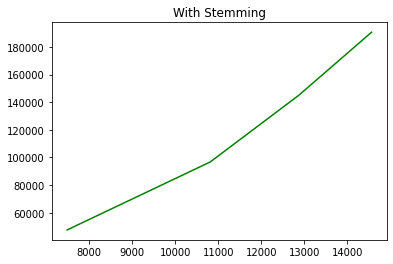

In [16]:
pos_index = PositionalIndex(documents_url=docs_url, documents_title=docs_title, documents_content=docs_content)

## Without Stemming

at 500th document we seen 49652 total tokens and dictionary size was 9701
at 1000th document we seen 101067 total tokens and dictionary size was 14433
at 1500th document we seen 151450 total tokens and dictionary size was 17455
at 2000th document we seen 199074 total tokens and dictionary size was 19870
at 12202th document we seen 1595725 total tokens and dictionary size was 72354


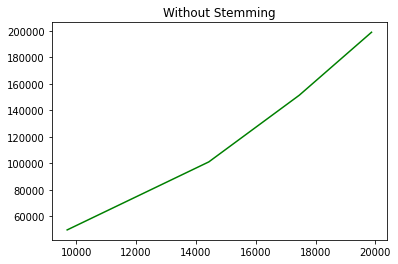

In [63]:
pos_index2 = PositionalIndex(documents_url=docs_url, documents_title=docs_title, documents_content=docs_content)

In [ ]:
def size_calculator(positional_index, title):
    from matplotlib import pyplot as plt
    uniq = set()
    x = []
    y = []

    for i, token in enumerate(positional_index.positional_index_structure):
        uniq.add(token)
        x.append(i)
        y.append(len(uniq))
    plt.clf()
    plt.title(title)
    plt.plot(x, y, 'r-')
    plt.show()


print(f'500: {y[499]} tokens and dictionary ')
size_calculator(pos_index, 'with stemming')

# Zipf law

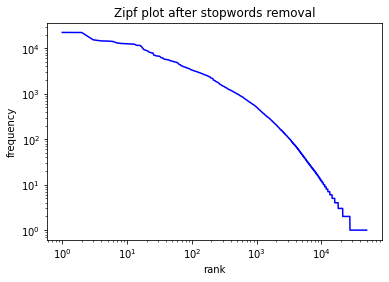

In [27]:
def zipf_law(frequencies, title):
    from matplotlib import pyplot as plt

    frequencies.sort(reverse=True)

    # enumerate the ranks and frequencies
    rf = [(r + 1, f) for r, f in enumerate(frequencies)]
    rs, fs = zip(*rf)

    plt.clf()
    plt.xscale('log')
    plt.yscale('log')
    plt.title(title)
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.plot(rs, fs, 'b-')
    plt.show()


occurrences = [info['total occurrences'] for info in (pos_index.positional_index_structure.values())]
zipf_law(occurrences, 'Zipf plot after stopwords removal')


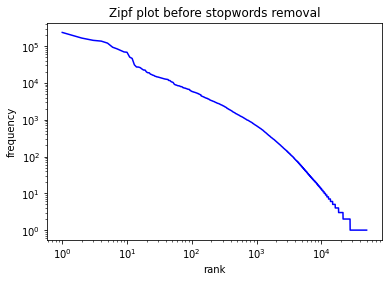

In [26]:
pos2_index = PositionalIndex(documents_url=docs_url, documents_title=docs_title, documents_content=docs_content)
occurrences = [info['total occurrences'] for info in (pos2_index.positional_index_structure.values())]
zipf_law(occurrences, 'Zipf plot before stopwords removal')

In [17]:
def docID(number, lst_urls):
    return lst_urls[number]


def position(plist):
    return plist['positions']


def pos_intersect(p1, p2, k):
    answer = {}  # answer <- ()
    len1 = len(p1)
    len2 = len(p2)
    i = j = 0
    lst_urls1 = sorted(list(p1.keys()))
    lst_urls2 = sorted(list(p2.keys()))
    while i != len1 and j != len2:
        key = docID(i, lst_urls1)
        key2 = docID(j, lst_urls2)
        if key == key2:
            l = []
            pp1 = position(p1[key])
            pp2 = position(p2[key])

            plen1 = len(pp1)
            plen2 = len(pp2)
            ii = jj = 0
            while ii != plen1:
                while jj != plen2:
                    if abs(pp1[ii] - pp2[jj]) <= k:
                        l.append(pp2[jj])
                    elif pp2[jj] > pp1[ii]:
                        break
                    jj += 1
                # l.sort()
                while l != [] and abs(l[0] - pp1[ii]) > k:
                    l.remove(l[0])
                for ps in l:
                    if key in answer:
                        # answer[key]['positions'].extend([pp1[ii], ps])
                        answer[key]['positions'].extend([max(pp1[ii], ps)])
                    else:
                        answer[key] = {'positions': [max(pp1[ii], ps)]}
                ii += 1
            i += 1
            j += 1
            if key in answer:
                answer[key]['positions'] = list(set(answer[key]['positions']))
        elif key < key2:
            i += 1
        else:
            j += 1
    return answer


def calc_string(string):
    state = False
    i = 0
    while i < len(string):
        ch = string[i]
        if ch == "\"":
            if state:
                string = string[:i] + '>' + string[i + 1:]
            else:
                string = string[:i] + '<' + string[i + 1:]
            state = 1 ^ state
        elif ch == '!':
            string = string[:i - 1] + ' _NOT_ ' + string[i + 1:]
        i += 1
    return string


def preprocess_query(query):
    query = calc_string(query)
    return preprocess_pipeline(query)


def preprocess_pipeline(query):
    str_empty = ' '
    stemmer = Stemmer()
    query = normalizer.normalize(query)
    query = word_tokenize(query)
    query = StopWord(normal=False).clean(query)
    query = [stemmer.stem(word) for word in query]
    query = str_empty.join(query)
    return query


class QueryHandler:
    def __init__(self, positional_index):
        self.positional_index = positional_index

    def answer_query(self, query):
        query = preprocess_query(query)
        not_queries = []
        and_queries = []
        empty_str = ' '
        is_not = False
        is_consecutive = False
        consecutive = []

        i = 0
        while i < len(query):
            next_occur = query.find(empty_str, i)
            substr = query[i:next_occur]
            if next_occur == -1:
                substr = query[i:]
            if substr == '_NOT_':
                is_not = True
                i = next_occur + 1
                continue
            elif is_not:
                not_queries.append(self.get_result([substr]))
                is_not = False
                i = next_occur + 1
                if next_occur == -1:
                    break
                continue
            elif substr[0] == '<':
                word = preprocess_pipeline(substr[1:])
                if word:
                    consecutive.append(word)
                i = next_occur + 1
                is_consecutive = True
                continue
            elif substr[-1] == '>':
                word = preprocess_pipeline(substr[:-1])
                if word:
                    consecutive.append(word)
                and_queries.append(self.get_result(consecutive))
                i = next_occur + 1
                consecutive.clear()
                is_consecutive = False
                if next_occur == -1:
                    break
                continue
            elif is_consecutive:
                consecutive.append(substr)
                i = next_occur + 1
                continue
            and_queries.append(self.get_result([substr]))
            i = next_occur + 1
            if next_occur == -1:
                break
        and_results = self.handle_queries(and_queries)
        not_results = self.handle_queries(not_queries)
        query_result = self.remove_by_sub_queries(and_results, not_results)
        get_score = lambda x: x['score']
        return sorted(query_result, key=get_score, reverse=True)

    def remove_by_sub_queries(self, in_results, out_results):
        answer = []
        for in_item_url in in_results:
            if in_item_url in out_results:
                continue
            index = {'title': self.positional_index.url_to_information[in_item_url]['title'],
                     'score': len(in_results[in_item_url]['positions']),
                     'url': in_item_url,
                     'content': self.positional_index.url_to_information[in_item_url]['content']}
            answer.append(index)
        return answer

    @staticmethod
    def handle_queries(queries):
        if not queries:
            return {}
        temporary_result = queries[0]
        for item_to_intersect in queries[1:]:
            if temporary_result:
                temporary_result = pos_intersect(temporary_result, item_to_intersect, 1000000)
            else:
                temporary_result = item_to_intersect
        return temporary_result

    def get_result(self, words):
        if words[0] not in self.positional_index.positional_index_structure:
            return {}
        temp_result = self.positional_index.positional_index_structure[words[0]]['indexes']
        for word in words[1:]:
            if word not in self.positional_index.positional_index_structure:
                temp_result = {}
                break
            indexes_of_word = self.positional_index.positional_index_structure[word]['indexes']
            if temp_result:
                temp_result = pos_intersect(temp_result, indexes_of_word, 1)
            else:
                temp_result = indexes_of_word
        return temp_result


query_handler = QueryHandler(positional_index=pos_index)


In [18]:
def print_results(query_string, number_to_prints=10):
    for single_result in query_handler.answer_query(query_string)[:number_to_prints]:
        print(f"score: {single_result['score']},\n"
              f"url: {single_result['url']},\n"
              f"title: {single_result['title']}\n"
              f'content: {single_result["content"]}\n*********************************************************\n\n')

# sample results


In [27]:
print_results('نرخ استخاره')

In [24]:
print_results('تیم استقلال')

score: 97,
url: https://www.farsnews.ir/news/14001024000498/6-نکته-از-لیگ-برتر-در-نیم-فصل-اول|-پرسپولیس-و-5-تیم-رکورددار-حاشیه-,
title: 16 نکته از لیگ برتر در نیم فصل اول| پرسپولیس و 5 تیم رکورددار حاشیه/ زمینِ سفت نویدکیا و لطف قلعه‌نویی به استقلال
content: 
مرتضی رحمانی_ به گزارش خبرنگار ورزشی خبرگزاری فارس، نیم فصل اول مسابقات لیگ برتر در شرایطی به پایان رسید که 16 تیم لیگ برتری شرایط پیچیده ای را تجربه کردند. استقلال در نیم فصل اول قهرمان شد و پرسپولیس در تعقیب شاگردان مجیدی در رده دوم ایستاد. در انتهای جدول هم نفت مسجد سلیمان با پدیده کاندیدای سقوط هستند. در این گزارش به حواشی حذف استقلال و پرسپولیس از آسیا اشاره نشده هر چند در یکی دو هفته آخر هر دو تیم با اخبار ناخوشایند تحت تاثیر این اتفاق قرار گرفتند. در گزارش زیر به نکات مهم 16 تیم لیگ برتری که در نیم فصل اول برای آنها اتفاق افتاده اشاره شده است: * استقلال قهرمانی که حواشی کمی داشت ولی دلچسب بازی نکرد کمتر از یک ماه به شروع لیگ مصطفی آجورلو جای احمد مددی را در استقلال گرفت و در همان ابتدا قرارداد مجیدی را تمدید کرد تا خیال کاد